## Reading data

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

Data is gotten from here: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
drive.mount('/content/drive', force_remount=True )
os.chdir('drive/My Drive/' ) #enter your own filepath here
df = pd.read_csv('heart.csv')
print( df.shape )

Mounted at /content/drive
(918, 12)


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Cleaning data

In [ ]:
#let's look at the datatypes for each column
for x in df.columns:
  print( str( type( df[x].iloc[0] ) ) + ": " + x )

<class 'numpy.int64'>: Age
<class 'str'>: Sex
<class 'str'>: ChestPainType
<class 'numpy.int64'>: RestingBP
<class 'numpy.int64'>: Cholesterol
<class 'numpy.int64'>: FastingBS
<class 'str'>: RestingECG
<class 'numpy.int64'>: MaxHR
<class 'str'>: ExerciseAngina
<class 'numpy.float64'>: Oldpeak
<class 'str'>: ST_Slope
<class 'numpy.int64'>: HeartDisease


In [ ]:
#non-null values in each column
df.count()

,0
Age,918
Sex,918
ChestPainType,918
RestingBP,918
Cholesterol,918
FastingBS,918
RestingECG,918
MaxHR,918
ExerciseAngina,918
Oldpeak,918


In [ ]:
for x in df.columns:
  print( df[x].value_counts() )

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64
Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64
Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64
FastingBS
0    704
1    214
Name: count, dtype:

In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [ ]:
#Gonna have to change this manually or find a way to do it without explicitly writing column names (Done :)
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns


for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

## Models

Splitting data into test and train

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42,test_size=0.2, shuffle=True)

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]


In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8351498637602179, 0.5978260869565217]
3 : [0.8201634877384196, 0.6521739130434783]
4 : [0.7970027247956403, 0.6793478260869565]
5 : [0.7929155313351499, 0.7010869565217391]
6 : [0.776566757493188, 0.6630434782608695]
7 : [0.7861035422343324, 0.6630434782608695]
8 : [0.7861035422343324, 0.6413043478260869]
9 : [0.7806539509536785, 0.6630434782608695]
10 : [0.771117166212534, 0.6413043478260869]
11 : [0.7697547683923706, 0.6521739130434783]
12 : [0.7683923705722071, 0.6467391304347826]
13 : [0.7588555858310627, 0.6739130434782609]
14 : [0.7493188010899182, 0.6630434782608695]
15 : [0.7465940054495913, 0.6630434782608695]
16 : [0.7397820163487738, 0.6358695652173914]
17 : [0.7465940054495913, 0.6630434782608695]
18 : [0.7370572207084468, 0.6467391304347826]
19 : [0.7465940054495913, 0.6630434782608695]
20 : [0.7329700272479565, 0.6521739130434783]


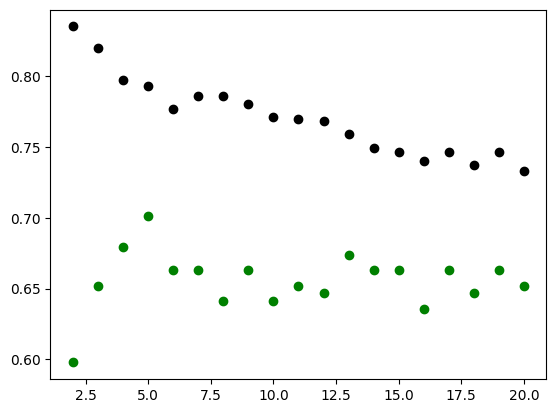

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print( f'Train: {training_score}' )
print( f'Test: {test_score}' )

Train: 1.0
Test: 0.782608695652174


[Text(0.5475833333333333, 0.96875, 'x[10] <= 1.5\ngini = 0.496\nsamples = 734\nvalue = [333, 401]'),
 Text(0.2885, 0.90625, 'x[2] <= 0.5\ngini = 0.305\nsamples = 427\nvalue = [80, 347]'),
 Text(0.41804166666666664, 0.9375, 'True  '),
 Text(0.129, 0.84375, 'x[1] <= 0.5\ngini = 0.177\nsamples = 296\nvalue = [29, 267]'),
 Text(0.07466666666666667, 0.78125, 'x[9] <= 1.3\ngini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.05333333333333334, 0.71875, 'x[0] <= 62.5\ngini = 0.48\nsamples = 25\nvalue = [10, 15]'),
 Text(0.042666666666666665, 0.65625, 'x[6] <= 0.5\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(0.021333333333333333, 0.59375, 'x[3] <= 142.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.010666666666666666, 0.53125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.032, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.064, 0.59375, 'x[7] <= 136.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.05333333333333334, 0.53125, 'x[4] <= 98.5\ngini =

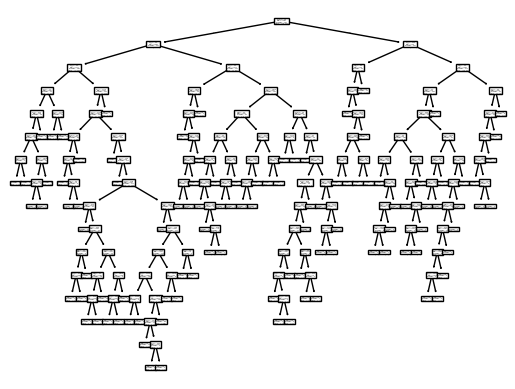

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

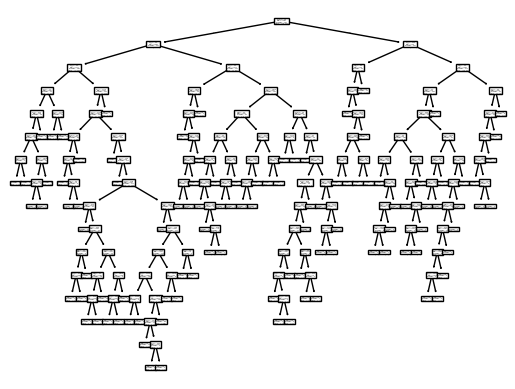

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.782608695652174


In [ ]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
#Decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
#GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

#Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.8337992731339112
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=16,
                       random_state=42)


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#Do some Naive Bayes here

nb = GaussianNB()
nb.fit(X_train, y_train)



## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
#Evaluate your model and compare it to the other models (Decision Trees and KNN)
#Using your understanding of the data, explain which model you think is best
#(hint: look at the different measures and stuff like FN and FP)